In [32]:
def coupon_test (Thickness: float = 2.511, 
                 Width: float = 10.03, 
                 file_name: str = 'testdata_1.csv',
                 low_bound: float = 0.1, 
                 upper_bound: float = 0.3):
    """
    Post-process a tensile coupon test and plot stress-strain curve.
    
    Args:
        Thickness (float): Specimen thickness in mm.
        Width (float): Specimen width in mm.
        file_name (str): CSV file containing test data.
        low_bound (float): Lower bound of elastic region as fraction of UTS.
        upper_bound (float): Upper bound of elastic region as fraction of UTS.
        save_path (str, optional): Path to save the figure. If None, do not save.

    Returns:
        fig (matplotlib.figure.Figure): Figure object containing the plot.
    """
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    # Constants
    Thickness # m (6.035mm)
    Width   # m (20 mm)
    area = Thickness * Width  # Calculate the area of the specimen
    
    # Load tensile test data
    df = pd.read_csv(file_name, header=[0])
    #df.columns = [f"{col[0]} {col[1]}" for col in df.columns]
    
    # Extract relevant columns
    #time = df["Time (sec)"]
    #displacement = df["Crosshead separation (mm)"]
    force = df["Instron Force (kN)"]
    elongation = df["Extensometer (mm/mm)"]
    strain = elongation # Strain in mm/mm
    
    # Calculate stress and strain
    force = force * 1000 # Convert kN to N
    stress = (force / area)  # N/m^2 or Pa
    uts = stress.max()
    
    #find the data before uts
    idx_peak = np.argmax(stress)
    strain_up = strain[:idx_peak+1]
    stress_up = stress[:idx_peak+1]
    #Boundary for 20% - 50% of UTS
    elastic_low = low_bound * uts
    elastic_up = upper_bound * uts
    
    elastic_reg = (elastic_low <= stress_up) & (stress_up <= elastic_up)
    
    stress_ela = stress_up[elastic_reg]
    strain_ela = strain_up[elastic_reg] 
    
    E, intercept = np.polyfit(strain_ela, stress_ela, 1)
    #print(f"Young's Modulus is: {E} MPa",)
    E_GPa = E / 1000  # Convert MPa to GPa
    #print(f"Intercept: {intercept} MPa")
    
    offset_decimal = 0.002  # 0.2% in decimal
    offset_line = E * (strain - offset_decimal) + intercept
    
    #Find the Yield strength
    diff = stress - offset_line
    cross_index = np.where(diff <= 0)[0][0]
    x1 = strain[cross_index-1]
    x2 = strain[cross_index]
    y1 = diff[cross_index-1]
    y2 = diff[cross_index]
    yield_strain = x1 - y1 * (x2 - x1) / (y2 - y1)
    yield_strength = np.interp(yield_strain, strain, stress)
    
    #Plot
    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(strain, stress, label='Stress-Strain Curve', color='blue')
    ax.plot(strain, offset_line, label='0.2% Offset Strain Line', color='yellow',linestyle = '--')
    ax.axhline(y=yield_strength, label=f'Yield Strength = {yield_strength:.2f} MPa', color='green', linestyle = '--')
    ax.axhline(y=uts, color='red', linestyle = '--', label=f'UTS = {uts:.2f} MPa')
    
    ax.set_xlabel('Strain (mm/mm)')
    ax.set_ylabel('Stress (MPa)')
    ax.set_title('Stress-Strain Curve with Mechanical Properties')
    ax.legend()
    ax.grid(True)
    ax.set_ylim(0, 500)
    plt.show()
    # Print results
    print(f"Young's Modulus (E): {E_GPa:.2f} GPa")
    print(f"Ultimate Tensile Strength (UTS): {uts:.2f} MPa")
    print(f"Yield Strength: {yield_strength:.2f} MPa")

     # Prepare results dictionary
    results = {
        "E_GPa": E_GPa,
        "UTS_MPa": uts,
        "Yield_Strength_MPa": yield_strength
    }
    return fig, results

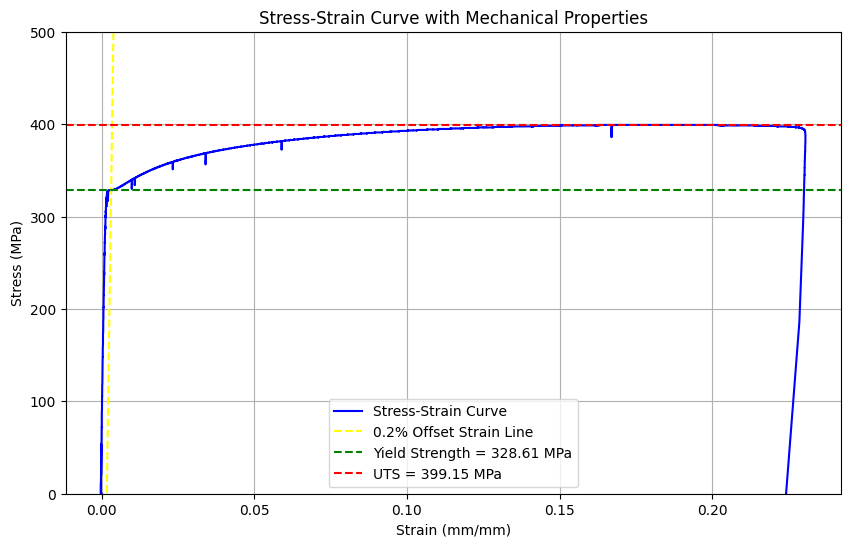

Young's Modulus (E): 229.94 GPa
Ultimate Tensile Strength (UTS): 399.15 MPa
Yield Strength: 328.61 MPa


(<Figure size 1000x600 with 1 Axes>,
 {'E_GPa': np.float64(229.94471329982136),
  'UTS_MPa': np.float64(399.1487758945386),
  'Yield_Strength_MPa': np.float64(328.6083933610084)})

In [37]:
coupon_test()

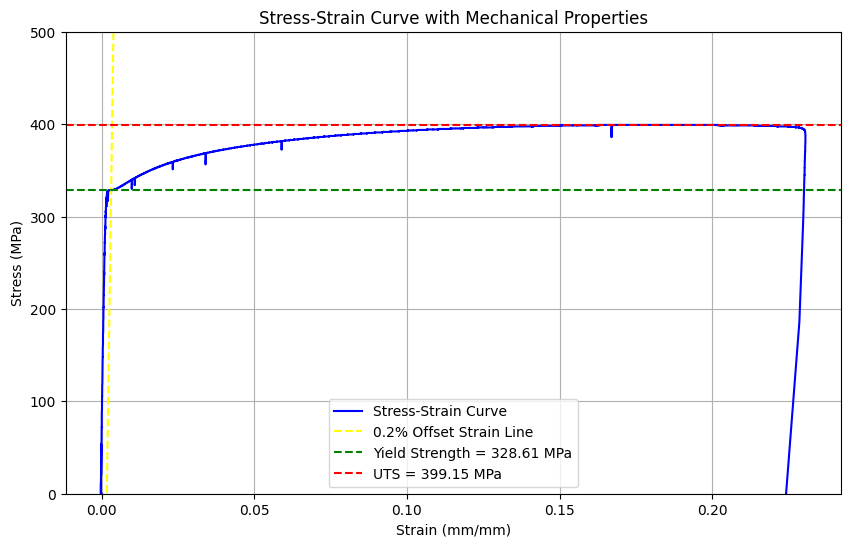

Young's Modulus (E): 229.94 GPa
Ultimate Tensile Strength (UTS): 399.15 MPa
Yield Strength: 328.61 MPa


In [40]:
fig, results = coupon_test(file_name='testdata_1.csv')

In [41]:
results['E_GPa']

np.float64(229.94471329982136)

In [30]:
test.savefig('stress_strain_curve.png', dpi=300, bbox_inches='tight')

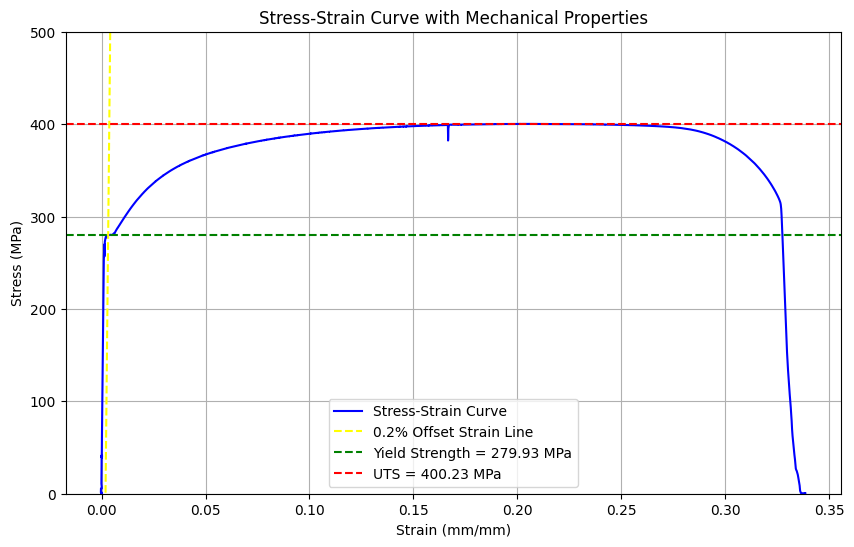

Young's Modulus (E): 222.19 GPa
Ultimate Tensile Strength (UTS): 400.23 MPa
Yield Strength: 279.93 MPa


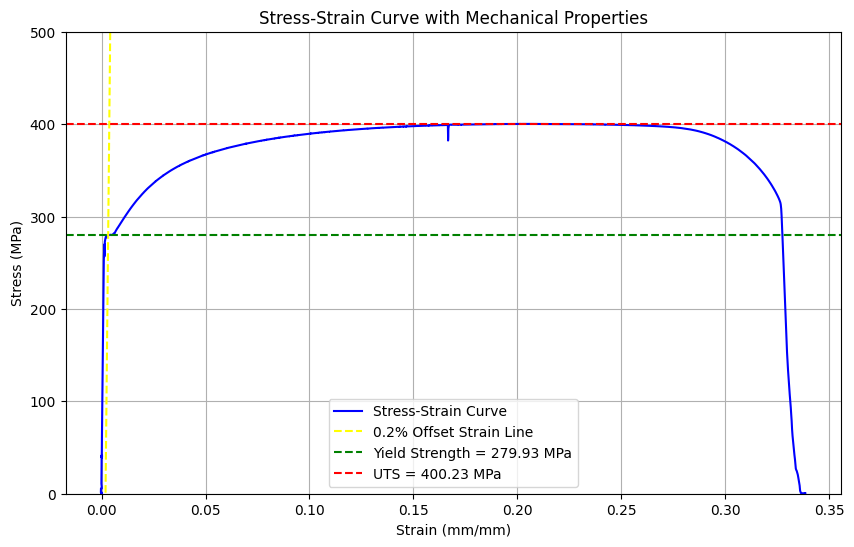

In [28]:
coupon_test(2.511, 10, 'testdata.csv',0.2,0.5)

In [22]:
t.savefig('stress_strain_curve.png', dpi=300, bbox_inches='tight')

Young's Modulus (E): 203.98 GPa
Ultimate Tensile Strength (UTS): 400.35 MPa
Yield Strength: 329.59 MPa


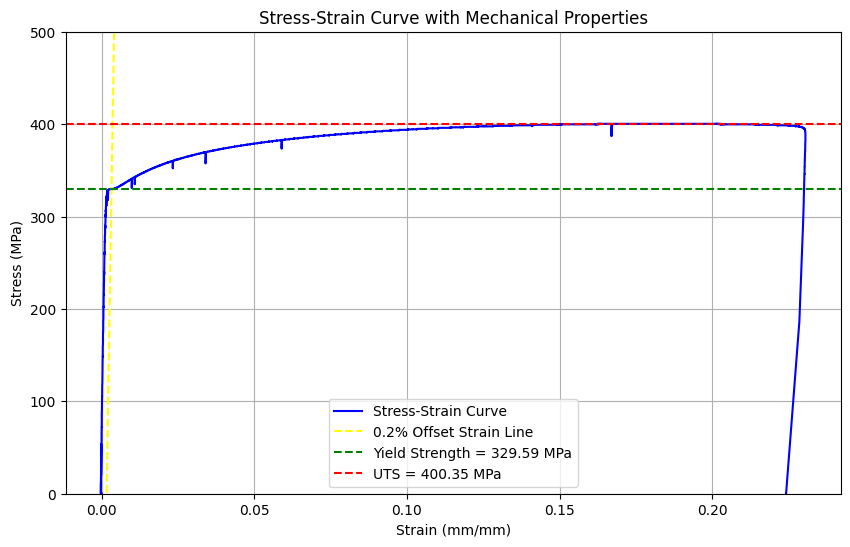

In [47]:
coupon_test(2.511, 10, 'testdata_1.csv')